In [10]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
print ('check')


check


In [16]:
import zipfile

# Path to the zip file containing the training data
zip_file_path = 'C:\\Users\\slpri\\OneDrive\\Desktop\\CAPSTONE PROJECT\\dataset.zip'

# Directory to extract the contents of the zip file
extracted_dir = 'C:\\Users\\slpri\\OneDrive\\Desktop\\CAPSTONE PROJECT\\dataset'

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

# Generate data paths with labels
train_data_dir = os.path.join(extracted_dir, 'Training')
filepaths = []
labels = []

folds = os.listdir(train_data_dir)
for fold in folds:
    foldpath = os.path.join(train_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='labels')
train_df = pd.concat([Fseries, Lseries], axis=1)


In [19]:
# Generate data paths with labels
train_data_dir = 'C:\\Users\\slpri\\OneDrive\\Desktop\\CAPSTONE PROJECT\\dataset\\Training'
filepaths = []
labels = []

folds = os.listdir(train_data_dir)
for fold in folds:
    foldpath = os.path.join(train_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
train_df = pd.concat([Fseries, Lseries], axis= 1)

In [22]:
# Generate data paths with labels
test_data_dir = 'C:\\Users\\slpri\\OneDrive\\Desktop\\CAPSTONE PROJECT\\dataset\\Testing'
filepaths = []
labels = []

folds = os.listdir(test_data_dir)
for fold in folds:
    foldpath = os.path.join(test_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
ts_df = pd.concat([Fseries, Lseries], axis= 1)

In [23]:
train_df

,filepaths,labels
0,C:\Users\slpri\OneDrive\Desktop\CAPSTONE PROJE...,glioma
1,C:\Users\slpri\OneDrive\Desktop\CAPSTONE PROJE...,glioma
2,C:\Users\slpri\OneDrive\Desktop\CAPSTONE PROJE...,glioma
3,C:\Users\slpri\OneDrive\Desktop\CAPSTONE PROJE...,glioma
4,C:\Users\slpri\OneDrive\Desktop\CAPSTONE PROJE...,glioma
...,...,...
5707,C:\Users\slpri\OneDrive\Desktop\CAPSTONE PROJE...,pituitary
5708,C:\Users\slpri\OneDrive\Desktop\CAPSTONE PROJE...,pituitary
5709,C:\Users\slpri\OneDrive\Desktop\CAPSTONE PROJE...,pituitary
5710,C:\Users\slpri\OneDrive\Desktop\CAPSTONE PROJE...,pituitary


In [24]:
ts_df

,filepaths,labels
0,C:\Users\slpri\OneDrive\Desktop\CAPSTONE PROJE...,glioma
1,C:\Users\slpri\OneDrive\Desktop\CAPSTONE PROJE...,glioma
2,C:\Users\slpri\OneDrive\Desktop\CAPSTONE PROJE...,glioma
3,C:\Users\slpri\OneDrive\Desktop\CAPSTONE PROJE...,glioma
4,C:\Users\slpri\OneDrive\Desktop\CAPSTONE PROJE...,glioma
...,...,...
1306,C:\Users\slpri\OneDrive\Desktop\CAPSTONE PROJE...,pituitary
1307,C:\Users\slpri\OneDrive\Desktop\CAPSTONE PROJE...,pituitary
1308,C:\Users\slpri\OneDrive\Desktop\CAPSTONE PROJE...,pituitary
1309,C:\Users\slpri\OneDrive\Desktop\CAPSTONE PROJE...,pituitary


In [25]:
valid_df, test_df = train_test_split(ts_df,  train_size= 0.5, shuffle= True, random_state= 123)

In [26]:
# crobed image size
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


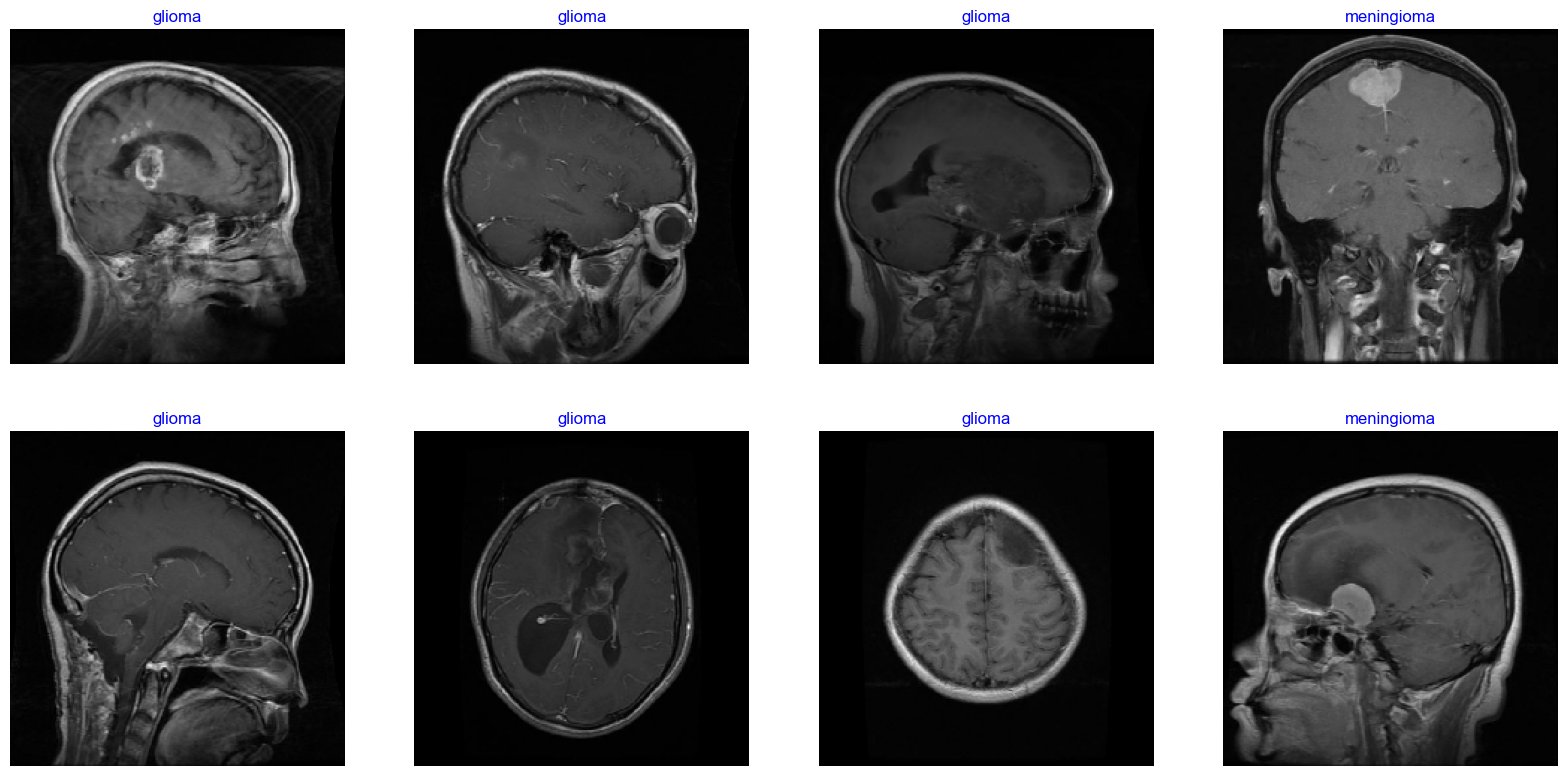

In [28]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator

plt.figure(figsize= (20, 20))

for i in range(8):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()

In [29]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = 4
model =Sequential ([
    Conv2D(filters=64,kernel_size=(3,3),activation="relu",input_shape=img_shape),
    Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    
    Conv2D(filters=128,kernel_size=(3,3),activation="relu"),
    Conv2D(filters=128,kernel_size=(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    
    
    Conv2D(filters=256,kernel_size=(3,3),activation="relu"),
    Conv2D(filters=256,kernel_size=(3,3),activation="relu"),
    Conv2D(filters=256,kernel_size=(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    
    Conv2D(filters=512,kernel_size=(3,3),activation="relu"),
    Conv2D(filters=512,kernel_size=(3,3),activation="relu"),
    Conv2D(filters=512,kernel_size=(3,3),activation="relu"),
    MaxPooling2D((2,2)),

    
    Conv2D(filters=512,kernel_size=(3,3),activation="relu"),
    Conv2D(filters=512,kernel_size=(3,3),activation="relu"),
    Conv2D(filters=512,kernel_size=(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(256,activation="relu"),
    
    Dense(128,activation="relu"),
    Dense(4,activation="softmax")
])
model.compile (Adamax(learning_rate=0.001),loss='categorical_crossentropy', metrics=["accuracy"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 51, 51, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 49, 49, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 47, 47, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 21, 21, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 19, 19, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 17, 17, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,879,428 (56.76 MB)

 Trainable params: 14,879,428 (56.76 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
epochs = 10   # number of all epochs in training

history = model.fit(train_gen , epochs= epochs , verbose= 1, validation_data= valid_gen, shuffle= False)

Epoch 1/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 2009s 6s/step - accuracy: 0.4132 - loss: 2.6467 - val_accuracy: 0.7069 - val_loss: 0.7087
Epoch 2/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 2052s 6s/step - accuracy: 0.7322 - loss: 0.6702 - val_accuracy: 0.7160 - val_loss: 0.6690
Epoch 3/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 7122s 20s/step - accuracy: 0.8145 - loss: 0.4805 - val_accuracy: 0.7863 - val_loss: 0.5308
Epoch 4/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 1686s 5s/step - accuracy: 0.8367 - loss: 0.4278 - val_accuracy: 0.8473 - val_loss: 0.3755
Epoch 5/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 1727s 5s/step - accuracy: 0.8921 - loss: 0.3050 - val_accuracy: 0.8840 - val_loss: 0.3055
Epoch 6/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 1720s 5s/step - accuracy: 0.9098 - loss: 0.2600 - val_accuracy: 0.8519 - val_loss: 0.3501
Epoch 7/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 1730s 5s/step - accuracy: 0.9325 - loss: 0.1954 - val_accuracy: 0.8626 - val_loss: 0.3297
Epoch 8/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 1729s 5s/step - accuracy: 0.9385 - loss: 0.1699 -

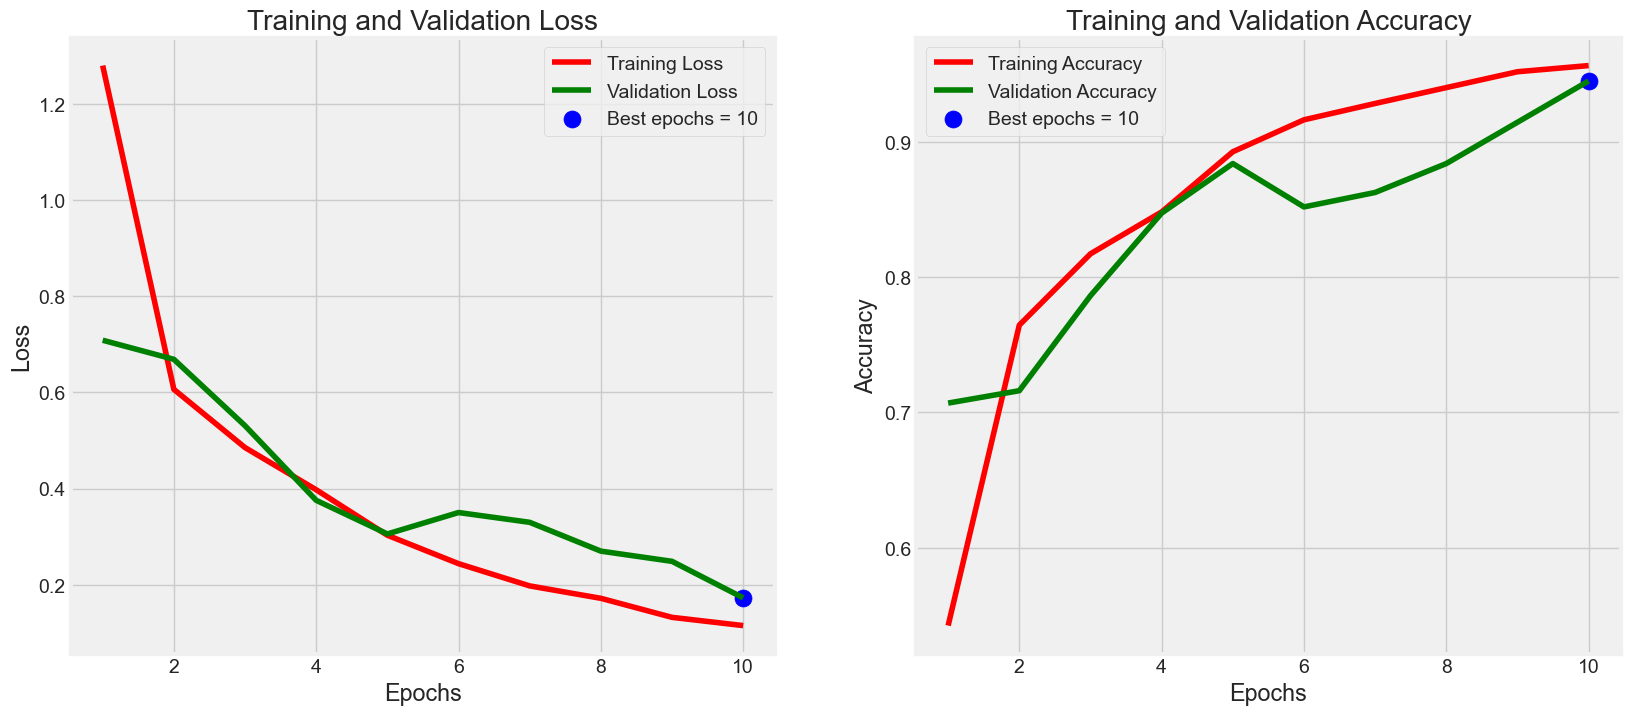

In [31]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

index_acc = np.argmax(val_acc)
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]

loss_label = f'Best epochs = {str(index_loss +1)}'
acc_label = f'Best epochs = {str(index_acc + 1)}'

plt.figure(figsize= (20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(Epochs , train_loss , 'r' , label = 'Training Loss')
plt.plot(Epochs , val_loss , 'g' , label = 'Validation Loss')
plt.scatter(index_loss + 1 , val_lowest , s = 150 , c = 'blue',label = loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Epochs , train_acc , 'r' , label = 'Training Accuracy')
plt.plot(Epochs , val_acc , 'g' , label = 'Validation Accuracy')
plt.scatter(index_acc + 1 , val_highest , s = 150 , c = 'blue',label = acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout
plt.show();

In [32]:
train_score = model.evaluate(train_gen , steps =16 , verbose = 1)
valid_score = model.evaluate(valid_gen , steps = 16 , verbose = 1)
test_score = model.evaluate(test_gen , steps = 16 , verbose = 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 781ms/step - accuracy: 0.9838 - loss: 0.0523
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9676 - loss: 0.1479
16/16 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.9352 - loss: 0.2970
Train Loss:  0.05360693112015724
Train Accuracy:  0.98046875
--------------------
Validation Loss:  0.1651095151901245
Validation Accuracy:  0.95703125
--------------------
Test Loss:  0.23091956973075867
Test Accuracy:  0.9375


In [33]:
preds = model.predict(test_gen)

y_pred = np.argmax(preds , axis = 1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step


In [34]:
preds

array([[1.3945280e-01, 8.5968494e-01, 4.6401066e-04, 3.9823065e-04],
       [1.7756253e-07, 1.5810232e-03, 9.9839836e-01, 2.0544467e-05],
       [1.9647594e-07, 2.0223708e-06, 5.0789872e-06, 9.9999273e-01],
       ...,
       [1.3361812e-10, 8.8961770e-07, 4.8648779e-08, 9.9999917e-01],
       [4.4842088e-01, 5.4639673e-01, 3.3633162e-03, 1.8190612e-03],
       [4.2389092e-06, 1.2280874e-02, 9.8746955e-01, 2.4530894e-04]],
      dtype=float32)

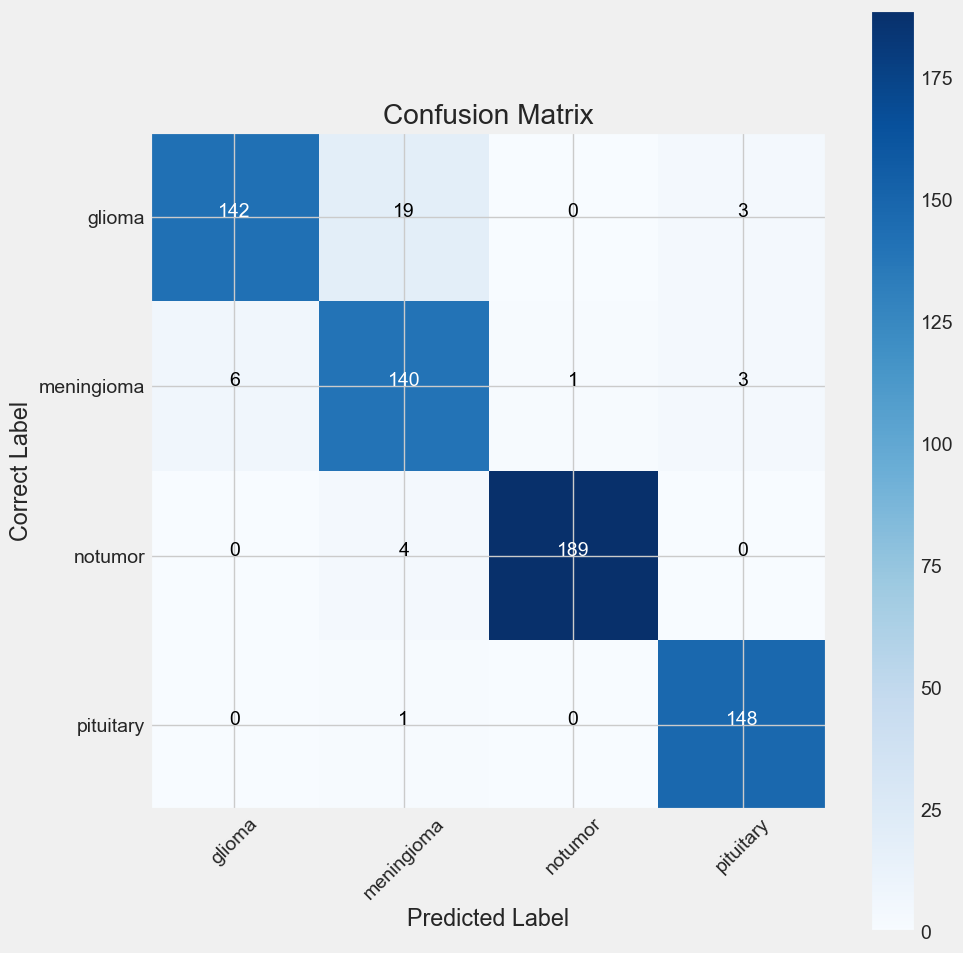

In [37]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('Correct Label')
plt.xlabel('Predicted Label')

plt.show()

In [36]:
print(classification_report(test_gen.classes, y_pred , target_names= classes ))

              precision    recall  f1-score   support

      glioma       0.96      0.87      0.91       164
  meningioma       0.85      0.93      0.89       150
     notumor       0.99      0.98      0.99       193
   pituitary       0.96      0.99      0.98       149

    accuracy                           0.94       656
   macro avg       0.94      0.94      0.94       656
weighted avg       0.95      0.94      0.94       656

